In [72]:
from ema_workbench import (
    TimeSeriesOutcome, 
    ScalarOutcome,
    perform_experiments, 
    RealParameter,
    CategoricalParameter,
    ema_logging, 
    MultiprocessingEvaluator,
    ScalarOutcome,
    ArrayOutcome,
    Constant,
    Model,
    Policy
)
from ema_workbench.connectors.vensim import VensimModel
from ema_workbench.em_framework import CategoricalParameter
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

In [73]:
import matplotlib.pyplot as plt
from ema_workbench.analysis.plotting import lines
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats.kde as kde


In [74]:
if __name__ == "__main__":
    ema_logging.log_to_stderr(ema_logging.INFO)
   

In [75]:
wd = r"./Models"
#model = VensimModel("simpleModel", wd=wd, model_file="Thesismodel no policy.vpmx") 
#model = VensimModel("simpleModel", wd=wd, model_file="Thesismodel exisiting policy.vpmx")
#model = VensimModel("simpleModel", wd=wd, model_file="Thesismodel new policy.vpmx")
model = VensimModel("simpleModel", wd=wd, model_file="Thesismodel 4.vpmx")

In [76]:
model.outcomes = [
#    TimeSeriesOutcome('Industrial CO2 savings with green hydrogen'),
#    TimeSeriesOutcome("MW installed"),
#    TimeSeriesOutcome("LCOH[green hydrogen]"),
    #TimeSeriesOutcome("satisfied demand"),
#    TimeSeriesOutcome("hydrogen type demand[green hydrogen]"),
#    TimeSeriesOutcome("kpi"),
    #TimeSeriesOutcome("total project funnel[green hydrogen]"),
    #TimeSeriesOutcome("Hydrogen type demand[green hydrogen]"),
    #TimeSeriesOutcome("total development time[green hydrogen]"),
    ScalarOutcome('max mw installed', variable_name='MW installed',function=np.max),
    ScalarOutcome('min production costs', variable_name='LCOH[green hydrogen]',function=np.min),

]

In [77]:
model.uncertainties = [
#Green H2
    RealParameter("Learning rate",0.04,0.06),
    RealParameter("Innovation cycle",4,6),
    RealParameter("Relative elasticity",-0.8,-0.4),
    RealParameter("Market adaptation speed",0.4,0.8),
    RealParameter("Scaling factor",0.5,2),
    RealParameter("Electrolysis development",0.08,0.31),
    RealParameter("Max efficiency",0.8,0.9),
    RealParameter("CO2 elasticity", 0.4,0.8),
    RealParameter("Market maturity",0.2,0.6),
    RealParameter("Initial CAPEX", 4000, 6500),
    RealParameter("Operation & maintenance costs",0.05,0.15),
#H2 Demand
    RealParameter("Demand substitution rate",0.1,2),
    RealParameter("Price elasticity of demand[Green hydrogen]",-3,-1.5),
    RealParameter("Price elasticity of demand[Blue hydrogen]",-2.5,-1,),
    RealParameter("Price elasticity of demand[Grey hydrogen]",-1,0),
    RealParameter("Substitution delay",1.5,4.5),
    RealParameter("Premium value[Refineries]",0,2000),
    RealParameter("Premium value[Methanol]",0,2000),
    RealParameter("Premium value[Ammonia]",0,2000),
    RealParameter("Premium value[Steel]",0,2000),
    RealParameter("Premium value[Transport]",0,2000),
    RealParameter("Premium value[Synthetic fuels]",0,2000),
    RealParameter("Allocation key SDE",0,0.2),
    RealParameter("Allocation key",0,0.2),
    
# #RES

    RealParameter("Roadmap WOZ",1000,2000),
    RealParameter("Onshore RES increase",0.01,0.04),
    RealParameter("Other additional renewables",0.01,0.04),
    RealParameter("Domestic electrification",0.03,0.05),
    RealParameter("Min Capex",500,2000),
    RealParameter("Policy market size adjustment[Refineries]",0.01,0.03),
    RealParameter("Policy market size adjustment[Methanol]",-0.02,0.02),
    RealParameter("Policy market size adjustment[Transport]",-0.02,0.02),
    RealParameter("Policy market size adjustment[Ammonia]",-0.02,0.02),
    RealParameter("Policy market size adjustment[EFuels]",-0.02,0.02),
    
# #Energy demand
    RealParameter("Transport fuel substitution rate", 0.1,0.2),
    RealParameter("Industrial energy substitution rate",0.1,0.2),
    RealParameter("Long term price effect",0.2,0.4),
    RealParameter("Short term price effect",0.1,0.3),
    RealParameter("Oil price",70,110),
    RealParameter("Coal price",70,110),
    RealParameter("Initial gas price",50,70),
    RealParameter("Initial electricity price",50,70),
    RealParameter("Biofuel price",1900,2100),
    RealParameter("Efuel price",2400,2600),
    RealParameter("Market reaction delay",0.8,1.2),
    RealParameter("Energy carrier demand elasticity",-0.6,-0.4),
    RealParameter("Business cycle",5,7),
    RealParameter("Average GDP growth",0.01,0.03),
    RealParameter("Innovation factor[Synthetic fuels]",0.01,0.02),
    RealParameter("Innovation factor[Biofuels]",0.01,0.02),
    RealParameter("Innovation factor[Electricity]",0.01,0.02),
    RealParameter("Efficiency increase",0.01,0.02)
                  ]

In [78]:
# policies = [
# #        Policy("No policy", model_file=r"Thesismodel no policy.vpmx"),
# #        Policy("Existing policy", model_file=r"Thesismodel exisiting policy.vpmx"),
#         Policy("New policy", model_file=r"Thesismodel new policy.vpmx"),
#     ]

In [79]:
from ema_workbench import MultiprocessingEvaluator, ema_logging, perform_experiments

ema_logging.log_to_stderr(ema_logging.INFO)

with MultiprocessingEvaluator(model, n_processes=7) as evaluator:
    results = evaluator.perform_experiments(scenarios=10000)
    #, policies = policies)

C:\Users\bern\anaconda3\lib\site-packages\ema_workbench\em_framework\evaluators.py:349: UserWarning: the number of processes cannot be more then 8
  warnings.warn(f"the number of processes cannot be more then {max_processes}")
[MainProcess/INFO] pool started with 7 workers
[MainProcess/INFO] performing 10000 scenarios * 1 policies * 1 model(s) = 10000 experiments
100%|████████████████████████████████████| 10000/10000 [34:01<00:00,  4.90it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [80]:
experiments, outcomes = results

In [81]:
# from ema_workbench import save_results
# save_results(results, r'./0804.tar.gz')

# PRIM capacity barrier

In [82]:
x = outcomes['max mw installed']
p = np.nanpercentile(x,20)
x = x<p
x = x.astype(int)
x = x.flatten()

In [83]:
from ema_workbench.analysis import prim

prim_alg = prim.Prim(experiments, x, threshold=0.7, peel_alpha=0.1)
box1 = prim_alg.find_box()


[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 10000 points remaining, containing 2000 cases of interest
[MainProcess/INFO] mean: 0.7895752895752896, mass: 0.0518, coverage: 0.2045, density: 0.7895752895752896 restricted_dimensions: 7


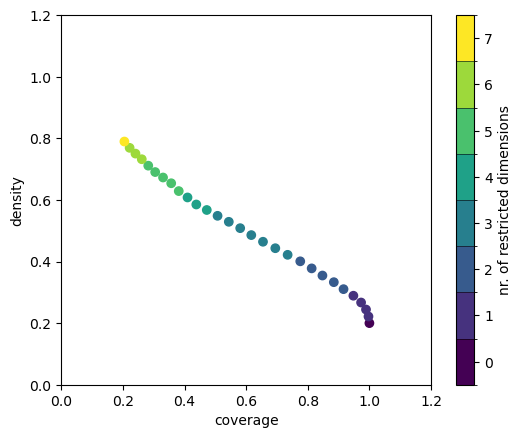

In [84]:
import matplotlib.pyplot as plt
box1.show_tradeoff()
plt.show()

coverage     0.204500
density      0.789575
id          28.000000
mass         0.051800
mean         0.789575
res_dim      7.000000
Name: 28, dtype: float64

                                                box 28               \
                                                   min          max   
Roadmap WOZ                                1000.090097  1312.706974   
Efficiency increase                           0.010000     0.015952   
Relative elasticity                          -0.799999    -0.474485   
Policy market size adjustment[Refineries]     0.010001     0.028033   
Policy market size adjustment[Ammonia]       -0.020000     0.016454   
Onshore RES increase                          0.010002     0.036956   
Demand substitution rate                      1.104498     1.999904   

                                                                       
                                               qp value      qp value  
Roadmap WOZ                                         NaN  2

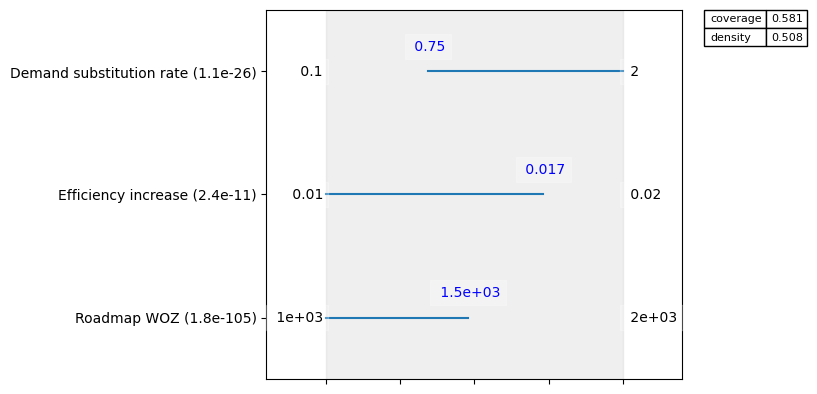

In [85]:
box1.inspect()
box1.inspect(14,style="graph")
plt.show()

# PRIM capacity driver

In [86]:
y = outcomes['max mw installed']
p = np.nanpercentile(y,80)
y = y>p
y = y.astype(int)
y = y.flatten()

In [87]:
prim_alg = prim.Prim(experiments, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 10000 points remaining, containing 2000 cases of interest
[MainProcess/INFO] mean: 0.8706563706563707, mass: 0.0518, coverage: 0.2255, density: 0.8706563706563707 restricted_dimensions: 6


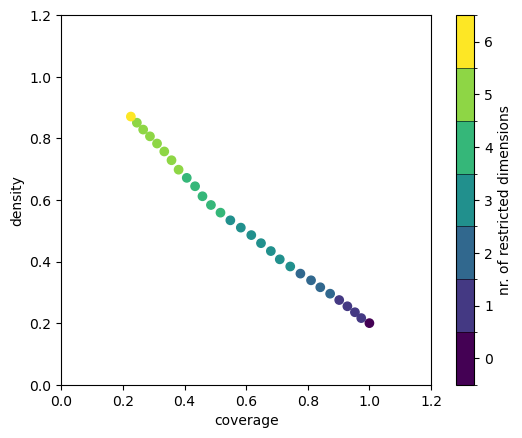

In [88]:
import matplotlib.pyplot as plt
box1.show_tradeoff()
plt.show()

coverage     0.225500
density      0.870656
id          28.000000
mass         0.051800
mean         0.870656
res_dim      6.000000
Name: 28, dtype: float64

                                             box 28               \
                                                min          max   
Demand substitution rate                   0.100143     0.831606   
Domestic electrification                   0.030000     0.048201   
Roadmap WOZ                             1647.172469  1999.919926   
Other additional renewables                0.019950     0.039999   
Policy market size adjustment[Ammonia]    -0.010175     0.019997   
Onshore RES increase                       0.012819     0.039997   

                                                                    
                                            qp value      qp value  
Demand substitution rate                         NaN  6.958258e-55  
Domestic electrification                         NaN  1.110879e-01  
Roadmap WOZ          

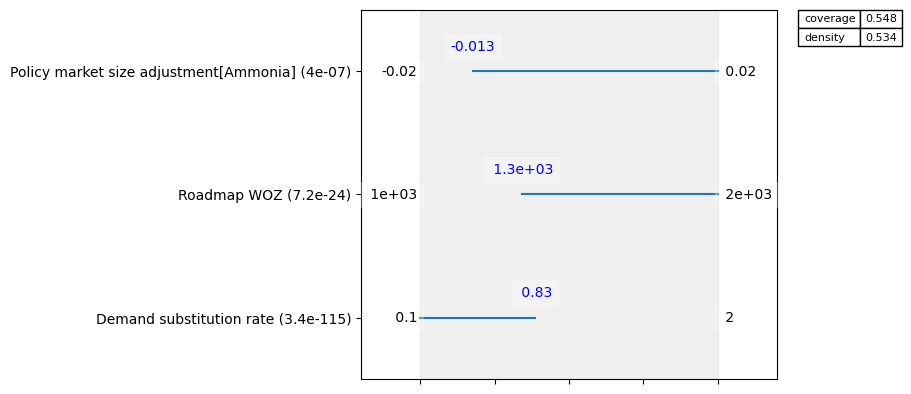

In [89]:
box1.inspect()
box1.inspect(15,style="graph")
plt.show()

# LCOH uncertainties

In [90]:
y = outcomes['min production costs']
p = np.nanpercentile(y,80)
y = y>p
y = y.astype(int)
y = y.flatten()

In [91]:
prim_alg = prim.Prim(experiments, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 10000 points remaining, containing 2000 cases of interest
[MainProcess/INFO] mean: 0.8816793893129771, mass: 0.0524, coverage: 0.231, density: 0.8816793893129771 restricted_dimensions: 7


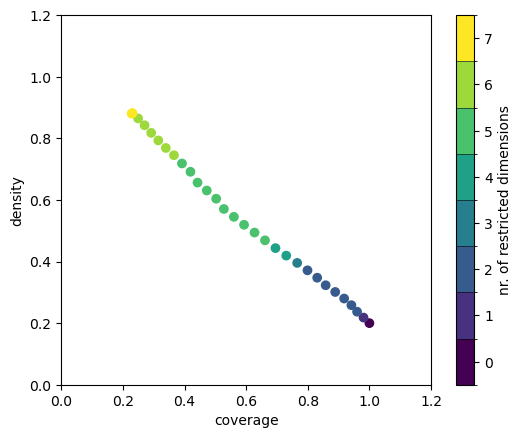

In [92]:
import matplotlib.pyplot as plt
box1.show_tradeoff()
plt.show()

coverage     0.231000
density      0.881679
id          30.000000
mass         0.052400
mean         0.881679
res_dim      7.000000
Name: 30, dtype: float64

                                  box 30                             \
                                     min          max      qp value   
Roadmap WOZ                  1000.090097  1274.921280           NaN   
Other additional renewables     0.010003     0.029475           NaN   
Onshore RES increase            0.010002     0.029041           NaN   
Relative elasticity            -0.799999    -0.484067           NaN   
Min Capex                    1019.519529  1999.904354  3.932089e-09   
Demand substitution rate        0.261244     1.999904  5.510122e-02   
Domestic electrification        0.032052     0.049998  1.499215e-01   

                                           
                                 qp value  
Roadmap WOZ                  1.739404e-84  
Other additional renewables  9.057000e-11  
Onshore RES increase      

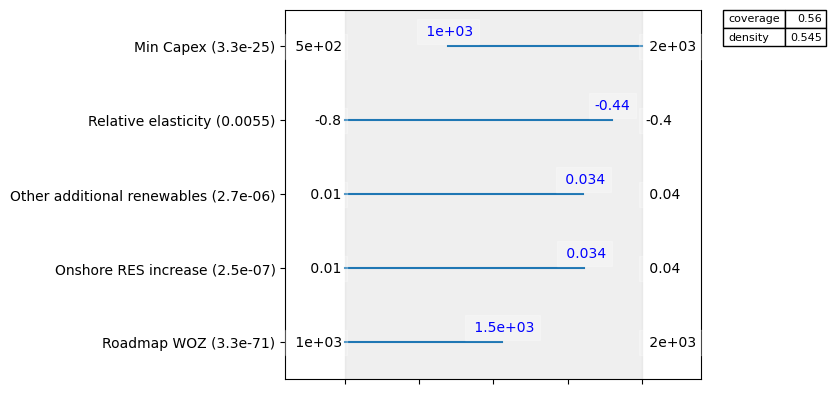

In [93]:
box1.inspect()
box1.inspect(15,style="graph")
plt.show()